<a href="https://colab.research.google.com/github/pravallika-1305/WISE_ML/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist

# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


## **Fully Connected Neural Network**

## Procedure

1.   Flatten the input image dimensions to 1D (width pixels x height pixels)
2.   Normalize the image pixel values (divide by 255)
3.   One-Hot Encode the categorical column
4.   Build a model architecture (Sequential) with Dense layers
5.   Train the model and make predictions



In [5]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils

In [6]:
# Flattening the images from the 28x28 pixels to 1D 784 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [8]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [9]:
# building a linear stack of layers with the sequential model
model = Sequential()
# hidden layer
model.add(Dense(100, input_shape=(784,), activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

In [10]:
# looking at the model summary
model.summary()
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.6377 - accuracy: 0.8208 - val_loss: 0.2148 - val_accuracy: 0.9368
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1939 - accuracy: 0.9451 - val_loss: 0.1503 - val_accuracy: 0.9563
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1386 - accuracy: 0.9604 - val_loss: 0.1193 - val_accuracy: 0.9632
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1052 - accur

## **CNN**

In [11]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

In [12]:
# to calculate accuracy
from sklearn.metrics import accuracy_score

In [13]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [15]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [16]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [17]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

In [18]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [19]:
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 38s 80ms/step - loss: 0.3737 - accuracy: 0.8900 - val_loss: 0.0803 - val_accuracy: 0.9750
Epoch 2/10
469/469 [==============================] - 38s 81ms/step - loss: 0.0620 - accuracy: 0.9818 - val_loss: 0.0640 - val_accuracy: 0.9788
Epoch 3/10
469/469 [==============================] - 38s 80ms/step - loss: 0.0351 - accuracy: 0.9898 - val_loss: 0.0517 - val_accuracy: 0.9822
Epoch 4/10
469/469 [==============================] - 38s 80ms/step - loss: 0.0223 - accuracy: 0.9931 - val_loss: 0.0611 - val_accuracy: 0.9810
Epoch 5/10
469/469 [==============================] - 38s 81ms/step - loss: 0.0134 - accuracy: 0.9964 - val_loss: 0.0591 - val_accuracy: 0.9829
Epoch 6/10
469/469 [==============================] - 38s 80ms/step - loss: 0.0105 - accuracy: 0.9970 - val_loss: 0.0573 - val_accuracy: 0.9821
Epoch 7/10
469/469 [==============================] - 38s 81ms/step - loss: 0.0067 - accuracy: 0.9984 - val_loss: 0.0587 - val_accuracy:

6	3	5	5	6	0	4	1	9	5	

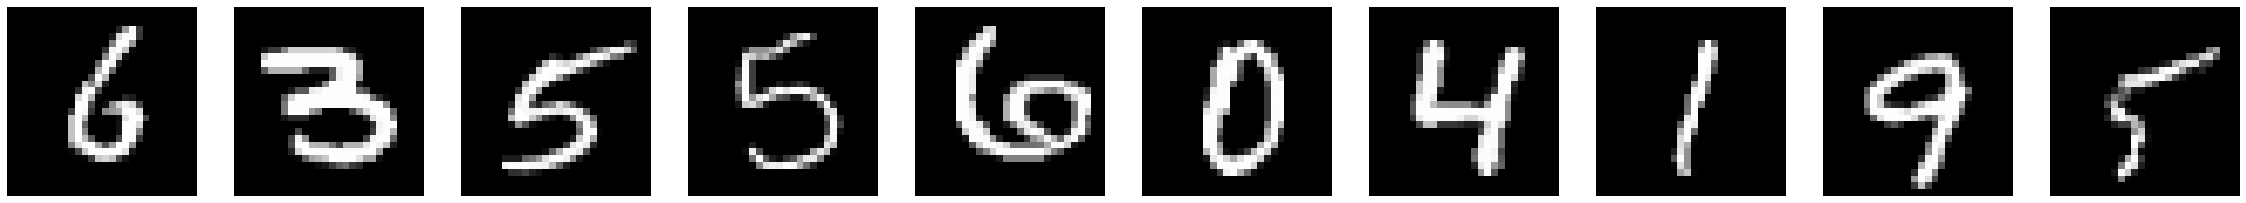

In [27]:
import matplotlib.pyplot as plt
import numpy as np
figure = plt.figure(figsize=(40,40))
for i in range(10):
    figure.add_subplot(1,10,i+1)
    plt.imshow(X_test[i+50,:,:,0],cmap="gray")
    plt.axis("off")
    print(np.squeeze(np.argmax(model.predict(X_test[i+50].reshape(1,28,28,1)),axis=1),axis=0),end="\t")